# Checkpoint 4 - Data Science

## Integrantes:
- **Guilherme Doretto Sobreiro** - RM: 99674
- **Guilherme Fazito Ziolli** - RM: 550539
- **Raí Gumieri dos Santos** - RM: 98287

---

## Resumo do Projeto

Neste checkpoint, nossa análise de data science focou em explorar e comparar dados de filmes de várias plataformas, como Netflix, Amazon, Rotten Tomatoes e IMDb. As principais atividades incluíram:

- **Comparação dos principais gêneros de filmes**: Análise dos gêneros mais comuns em Netflix e Amazon, com visualização dos 5 principais gêneros.
- **Quantidade de filmes e séries**: Comparação da quantidade total de filmes e séries disponíveis em Netflix e Amazon.
- **Avaliação de filmes específicos**: Análise detalhada dos filmes "The Expendables" e suas sequências em relação à audiência.
- **Análise de atores**: Comparação da quantidade de filmes de Leonardo DiCaprio disponíveis em Amazon e Netflix.
- **Análise de duração de filmes**: Comparação da média de duração dos filmes lançados nas décadas de 1980-1990 e 2012-2022.
- **Top e Piores Filmes e Séries**: Identificação dos melhores e piores filmes e séries na Netflix, baseado em avaliações.
- **Comparações diretas entre Netflix e Amazon.**

---



### Importações do programa

In [70]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LinearRegression

### Arquivos CSV


In [71]:
netflix_df = pd.read_csv('netflix_titles.csv')
netflix2_df = pd.read_csv('Netflix_TV_Shows_and_Movies.csv')
amazon_df = pd.read_csv('amazon_prime_titles.csv')
tomatos_df = pd.read_csv('rotten_tomatoes_movies.csv')

### Análise das informações

In [ ]:
netflix_df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1200,s1201,TV Show,Waffles + Mochi,NaN,"Michelle Zamora, Russ Walko, Michelle Obama, J...",United States,"March 16, 2021",2021,TV-Y,1 Season,Kids' TV,Curious puppet pals Waffles and Mochi travel t...
8474,s8475,TV Show,The Rap Game,NaN,Jermaine Dupri,United States,"September 15, 2019",2016,TV-14,1 Season,Reality TV,Young lyricists between the ages of 12 and 16 ...
2353,s2354,Movie,Chaman Bahaar,Apurva Dhar Badgaiyann,"Jitendra Kumar, Ritika Badiani, Yogendra Tikku...",India,"June 19, 2020",2020,TV-MA,112 min,"Comedies, Dramas, International Movies",A local shop becomes a hub for young men taken...
4899,s4900,Movie,Sometimes,Priyadarshan,"Prakash Raj, Shreya Reddy, Ashok Selvan",India,"May 1, 2018",2016,TV-14,101 min,"Dramas, International Movies",Seven strangers anxiously waiting for their HI...
1138,s1139,Movie,The Pianist,Roman Polański,"Adrien Brody, Thomas Kretschmann, Frank Finlay...","United Kingdom, France, Poland, Germany, Unite...","April 1, 2021",2002,R,149 min,"Dramas, Independent Movies, International Movies",Famed Polish pianist Wladyslaw Szpilman strugg...
7976,s7977,Movie,Secrets of Selfridges,Sam Taplin,Samuel West,United States,"April 22, 2017",2014,TV-PG,55 min,Documentaries,American Harry Gordon Selfridge introduced Lon...
3112,s3113,Movie,Being Mrs Elliot,Omoni Oboli,"Omoni Oboli, Majid Michel, Ayo Makun, Uru Eke,...",Nigeria,"December 20, 2019",2014,TV-14,113 min,"Dramas, International Movies, Romantic Movies",When a scorned wife from the city shares a cab...
3454,s3455,TV Show,Rotten,NaN,NaN,United States,"October 4, 2019",2019,TV-MA,2 Seasons,"Docuseries, Science & Nature TV",This docuseries travels deep into the heart of...
1843,s1844,Movie,Unfriended,Levan Gabriadze,"Shelley Hennig, Moses Storm, Renee Olstead, Wi...","United States, Russia","October 16, 2020",2014,R,83 min,"Horror Movies, Thrillers",Six teens whose cyberbullying drove their clas...
3580,s3581,Movie,Invader Zim: Enter the Florpus,NaN,"Richard Steven Horvitz, Rikki Simons, Andy Ber...","South Korea, United States","August 16, 2019",2019,TV-Y7,72 min,"Children & Family Movies, Comedies, Sci-Fi & F...",When Zim reappears to begin the next phase of ...


In [ ]:
amazon_df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5961,s5962,Movie,Crypto Legacy (2021),Charles A Townsend,"Brian Kunz, Sheri Dixon, Linzi Grey, Nathaniel...",NaN,NaN,2021,16+,72 min,"Action, Comedy, Horror",A young man fears his family's farm. He catche...
4914,s4915,Movie,Give,Steve Dayton,"Jason Anderson, Suzette Murty, Leo Dayton, Iri...",NaN,NaN,2020,13+,76 min,"Drama, Science Fiction","In this psychological thriller, a father deals..."
7020,s7021,Movie,Live Hard,Wook Hwang,"Jung Joon-Oh, Young Jin-Jo",NaN,NaN,2021,18+,100 min,Drama,"Chul, Seop, and Deok-kyu are desperate for jus..."
4679,s4680,Movie,Ameluk - based on a story which could be true,Mimmo Mancini,"Rosanna Banfi, Paolo Sassanelli, Mehdi Mahdloo...",Italy,NaN,2015,13+,98 min,Comedy,"It's Good Friday. In Mariotto, a small town in..."
1733,s1734,Movie,Maritime,NaN,NaN,NaN,NaN,2007,NR,33 min,Music Videos and Concerts,The Promise Ring + the Dismemberment Plan = Po...
5612,s5613,Movie,The Host,Andy Newbery,"Maryam Hassouni, Mike Beckingham, Dougie Poynter",NaN,NaN,2020,16+,103 min,Suspense,Robert and Vera try to do what's best for the ...
509,s510,TV Show,The Night Manager,NaN,"Hugh Laurie, Tom Hiddleston, Nader Boussandel",NaN,NaN,2016,18+,1 Season,"Action, Drama, Suspense",The Night Manager is based on John le Carre's ...
5674,s5675,Movie,The Secret: Dare to Dream,Andy Tennant,"Katie Holmes, Josh Lucas, Celia Weston, Jerry ...",NaN,NaN,2020,PG,108 min,Drama,A feel-good movie starring Katie Holmes and Jo...
8681,s8682,Movie,Maxwell,Colin Barr,"David Suchet, Patricia Hodge, Daniela Denby-As...",NaN,NaN,2007,16+,88 min,Drama,David Suchet stars as media tycoon Robert Maxe...
370,s371,TV Show,THEM,NaN,"Deborah Ayorinde, Ashley Thomas, Alison Pill, ...",NaN,NaN,2021,TV-14,1 Season,"Drama, Horror, Suspense",THEM is a limited anthology series that explor...


In [ ]:
tomatos_df.sample(10)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
16344,m/tomboy_2011,Tomboy,A 10-year-old girl (Zoé Héran) moves into a ne...,In tune with the emotion and tribulations of c...,NR,"Art House & International, Drama",Céline Sciamma,Céline Sciamma,"Zoé Héran, Jeanne Disson, Malonn Lévana, Sophi...",2011-11-16,...,Dada Films,Certified-Fresh,96.0,67.0,Upright,82.0,8313.0,28,64,3
16149,m/think_like_a_man_too,Think Like a Man Too,"In ""Think Like a Man,"" a group of close friend...",Think Like a Man Too reunites its predecessor'...,PG-13,"Comedy, Romance",Tim Story,"Keith Merryman, David A. Newman","Kevin Hart, Gabrielle Union, Adam Brody, Micha...",2014-06-20,...,Sony Pictures,Rotten,22.0,85.0,Spilled,59.0,40174.0,31,19,66
11506,m/outlaw_josey_wales,The Outlaw Josey Wales,Josey Wales (Clint Eastwood) watches helplessl...,Recreating the essence of his iconic Man With ...,PG,"Action & Adventure, Drama, Western",Clint Eastwood,"Philip Kaufman, Sonia Chernus","Clint Eastwood, Chief Dan George, Sondra Locke...",1976-06-30,...,Warner Home Video,Certified-Fresh,90.0,41.0,Upright,92.0,46791.0,6,37,4
12605,m/roadside_prophets,Roadside Prophets,Factory worker Joe (John Doe) leaves Los Angel...,NaN,R,"Action & Adventure, Comedy",Abbe Wool,Abbe Wool,"John Doe, Adam Horovitz, Arlo Guthrie, John Cu...",NaN,...,New Line Cinema,Fresh,83.0,6.0,Upright,63.0,1026.0,0,5,1
4417,m/centurion,Centurion,"In ancient Scotland, the Ninth Legion liberate...",It's a bloody geyser of Neil Marshall's typica...,R,"Action & Adventure, Drama, Mystery & Suspense",Neil Marshall,Neil Marshall,"Michael Fassbender, Dominic West, Olga Kurylen...",2010-08-27,...,Magnolia Pictures,Fresh,61.0,111.0,Spilled,43.0,47726.0,29,68,43
15833,m/the_sound_of_silence_2019,The Sound of Silence,"A successful house tuner in New York City, who...",The Sound of Silence occasionally struggles to...,NR,Drama,Michael Tyburski,Ben Nabors,"Peter Sarsgaard, Rashida Jones, Tony Revolori,...",2019-09-13,...,IFC Films,Fresh,65.0,43.0,Spilled,29.0,29.0,14,28,15
16048,m/the_winner_1997,The Winner,A long lucky streak makes a nice guy (Vincent ...,NaN,R,"Comedy, Drama, Mystery & Suspense",Alex Cox,Wendy Riss,"Rebecca De Mornay, Billy Bob Thornton, Vincent...",1997-07-25,...,Norstar Entertainment,Rotten,17.0,6.0,Spilled,9.0,81.0,0,1,5
3788,m/blue_caprice_2013,Blue Caprice,A man trains a teenager and turns him into a d...,"Smart, sobering, and quietly chilling, Blue Ca...",R,"Drama, Mystery & Suspense, Special Interest",Alexandre Moors,"Alexandre Moors, R.F.I. Porto","Isaiah Washington, Tequan Richmond, Tim Blake ...",2013-09-13,...,IFC Films,Certified-Fresh,83.0,84.0,Spilled,51.0,7253.0,30,70,14
14275,m/tater_tot_and_patton,Tater Tot & Patton,A wayward millenial disrupts her alcoholic unc...,NaN,NR,Drama,Andrew Kightlinger,Andrew Kightlinger,"Jessica Rothe, Bates Wilder, Forrest Weber",NaN,...,Bunker 15 Films,Fresh,86.0,21.0,Upright,91.0,47.0,0,18,3
9507,m/lifeforce,Lifeforce,When a space mission involving American and Br...,"Brazenly strange and uneven in its execution, ...",R,"Action & Adventure, Horror, Science Fiction & ...",Tobe Hooper,"Dan O'Bannon, Don Jakoby","Steve Railsback, Peter Firth, Frank Finlay, Ma...",1985-06-21,...,TriStar Pictures,Rotten,58.0,26.0,Spilled,45.0,9609.0,0,15,11


In [ ]:
netflix2_df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1859,s1860,Movie,Octonauts & the Great Barrier Reef,Blair Simmons,"Simon Greenall, Rob Rackstraw, Jo Wyatt, Paul ...",United Kingdom,"October 13, 2020",2020,TV-Y,47 min,Children & Family Movies,"In this musical special, the Octonauts must fi..."
8594,s8595,Movie,Tinker Bell and the Legend of the NeverBeast,Steve Loter,"Ginnifer Goodwin, Mae Whitman, Rosario Dawson,...",United States,"May 17, 2015",2014,G,78 min,Children & Family Movies,When suspicious scout fairies scheme to captur...
7481,s7482,Movie,Mona Lisa Smile,Mike Newell,"Julia Roberts, Kirsten Dunst, Julia Stiles, Ma...",United States,"January 1, 2019",2003,PG-13,119 min,Dramas,"In 1953, the women of Wellesley College are me..."
7756,s7757,TV Show,Portlandia,NaN,"Fred Armisen, Carrie Brownstein",United States,"September 25, 2019",2018,TV-14,8 Seasons,TV Comedies,Fred Armisen and Carrie Brownstein send up the...
2102,s2103,TV Show,Ojos in d' House,NaN,"'Najite Dede, Jude Chukwuka, Taiwo Arimoro, Od...",Nigeria,"August 22, 2020",2013,TV-G,1 Season,"International TV Shows, TV Comedies",After a newly rich family moves into an upper-...
8512,s8513,Movie,The Space Between Us,Peter Chelsom,"Gary Oldman, Asa Butterfield, Carla Gugino, Br...",United States,"June 1, 2019",2016,PG-13,120 min,"Action & Adventure, Romantic Movies, Sci-Fi & ...","After years of limited contact with Earth, an ..."
7553,s7554,Movie,Nacho Libre,Jared Hess,"Jack Black, Ana de la Reguera, Héctor Jiménez,...","United States, Mexico","November 1, 2019",2006,PG,92 min,"Comedies, Sports Movies",When Ignacio learns of an orphanage's financia...
65,s66,TV Show,Numberblocks,NaN,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,"September 15, 2021",2021,TV-Y,6 Seasons,Kids' TV,"In a place called Numberland, math adds up to ..."
7338,s7339,TV Show,Los 10 años de Peter Capusotto,NaN,"Diego Capusotto, Ivana Acosta",NaN,"June 29, 2018",2015,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",Fictional personality Peter Capusotto parodies...
7016,s7017,Movie,How to Change the World,Jerry Rothwell,NaN,"Canada, United Kingdom, Netherlands","January 1, 2016",2015,NR,110 min,"Documentaries, International Movies","In the 1970s, a group of activists who gathere..."


In [73]:
print(netflix2_df.columns)

Index(['index', 'id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'imdb_id', 'imdb_score', 'imdb_votes'],
      dtype='object')


In [74]:
print(netflix_df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


# Perguntas

## 1) Distribuição dos 5 Principais Gêneros de Filmes na Netflix e Amazon

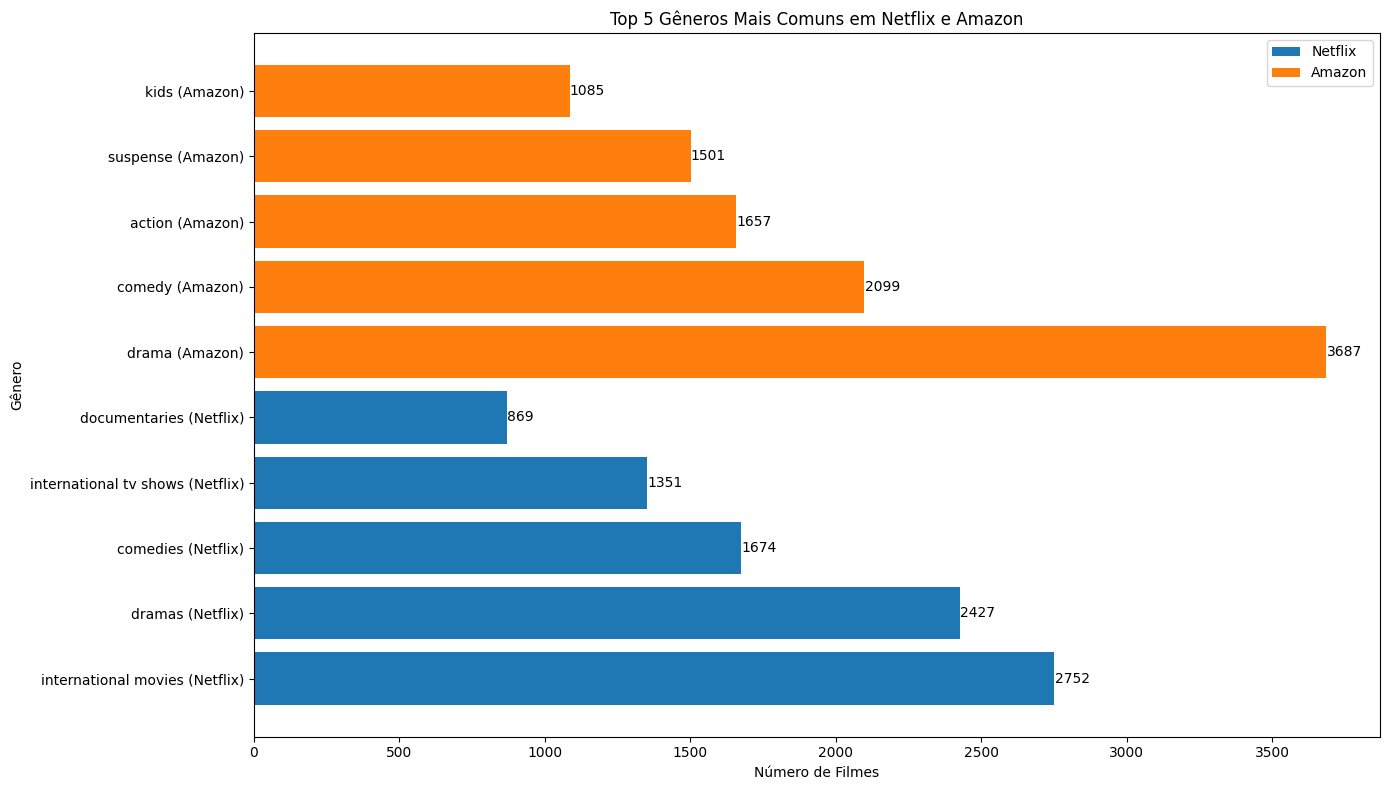

In [ ]:
# prepara e contar gêneros para netflix
netflix_genres = netflix_df['listed_in'].dropna().str.split(',', expand=True).stack()
netflix_genres = netflix_genres.str.strip().str.lower()
netflix_genre_counts = netflix_genres.value_counts().head(5).reset_index()
netflix_genre_counts.columns = ['genre', 'count']
netflix_genre_counts['source'] = 'Netflix'

# prepara e contar gêneros para Amazon
amazon_genres = amazon_df['listed_in'].dropna().str.split(',', expand=True).stack()
amazon_genres = amazon_genres.str.strip().str.lower()
amazon_genre_counts = amazon_genres.value_counts().head(5).reset_index()
amazon_genre_counts.columns = ['genre', 'count']
amazon_genre_counts['source'] = 'Amazon'

# concatena os dados para visualização
combined_genre_counts = pd.concat([netflix_genre_counts, amazon_genre_counts])

# visualizar a distribuição dos 5 principais gêneros
plt.figure(figsize=(14, 8))
for source in combined_genre_counts['source'].unique():
    subset = combined_genre_counts[combined_genre_counts['source'] == source]
    bars = plt.barh(subset['genre'] + ' (' + source + ')', subset['count'], label=source)

    # adicionar rótulos ao lado das barras
    for bar in bars:
        plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, str(int(bar.get_width())),
                 va='center', ha='left', fontsize=10, color='black')

plt.title('Top 5 Gêneros Mais Comuns em Netflix e Amazon')
plt.xlabel('Número de Filmes')
plt.ylabel('Gênero')
plt.legend()
plt.tight_layout()
plt.show()



---


**Conclusão**:

O gráfico mostra os 5 gêneros mais comuns de filmes na **Netflix** e na **Amazon**:

- **Amazon**: **Drama** lidera com 3687 filmes, seguido por **Comedy** (2099), **Action** (1657), **Suspense** (1501), e **Kids** (1085).
- **Netflix**: **International Movies** tem 2752 títulos, seguido por **Dramas** (2427), **Comedies** (1674), **International TV Shows** (1351), e **Documentaries** (869).

Resumo: **Dramas** são o gênero mais popular em ambas as plataformas, com a **Amazon** destacando-se pela quantidade de **dramas**, enquanto a **Netflix** oferece uma grande variedade de **filmes internacionais**.


---



## 2) Quantidade de filmes e séries em cada plataforma

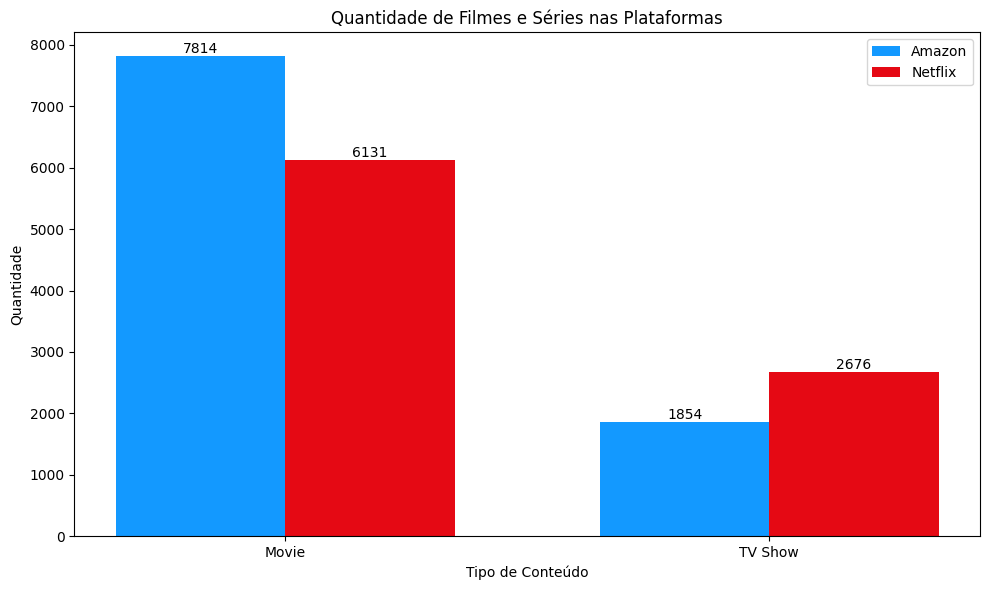

Quantidade na Amazon:
      type  count
0    Movie   7814
1  TV Show   1854

Quantidade na Netflix:
      type  count
0    Movie   6131
1  TV Show   2676


In [ ]:
# filtra as informações da Amazon e Netflix (Filmes e Séries)
amazon = amazon_df[(amazon_df["type"] == "Movie") | (amazon_df["type"] == "TV Show")]
netflix = netflix_df[(netflix_df["type"] == "Movie") | (netflix_df["type"] == "TV Show")]

# verifica a quantidade de valores de cada plataforma
amazon_qnt = amazon['type'].value_counts().reset_index(name='count')
netflix_qnt = netflix['type'].value_counts().reset_index(name='count')

# ajustar a posição das barras
bar_width = 0.35
index = range(len(amazon_qnt))

# criando o gráfico
plt.figure(figsize=(10, 6))

# gráfico de barras Amazon
plt.bar([i - bar_width/2 for i in index], amazon_qnt['count'], width=bar_width, label='Amazon', color='#1399FF')

# gráfico de barras Netflix
plt.bar([i + bar_width/2 for i in index], netflix_qnt['count'], width=bar_width, label='Netflix', color='#E50914')

# adiciona rótulos e título
plt.title('Quantidade de Filmes e Séries nas Plataformas')
plt.xlabel('Tipo de Conteúdo')
plt.ylabel('Quantidade')
plt.xticks(index, amazon_qnt['type'])  # Definindo os rótulos do eixo x
plt.legend()  # Mostra a legenda

# adiciona rótulos nas barras
for i in index:
    plt.text(i - bar_width/2, amazon_qnt['count'][i], str(amazon_qnt['count'][i]), ha='center', va='bottom')
    plt.text(i + bar_width/2, netflix_qnt['count'][i], str(netflix_qnt['count'][i]), ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Quantidade na Amazon:")
print(amazon_qnt)

print("\nQuantidade na Netflix:")
print(netflix_qnt)



---


**Conclusão**

O gráfico ilustra a quantidade de filmes e séries disponíveis em **Amazon** e **Netflix**:

**Amazon**:

- Movies: 7814
- TV Shows: 1854

**Netflix**:

- Movies: 6131
- TV Shows: 2676


**Resumo**: A **Amazon** oferece um maior número de filmes (7814) comparado à **Netflix** (6131), enquanto a **Netflix** tem uma quantidade superior de séries (2676) em relação à **Amazon** (1854). Isso indica que a **Amazon** foca mais em filmes, enquanto a **Netflix** proporciona uma variedade maior de séries.

---



## 3) Análise da Porcentagem de Audiência dos Filmes *The Expendables*

Audiência em portagem dos filmes

             movie_title  audience_rating
14910    The Expendables             64.0
14911  The Expendables 2             67.0
14912  The Expendables 3             49.0


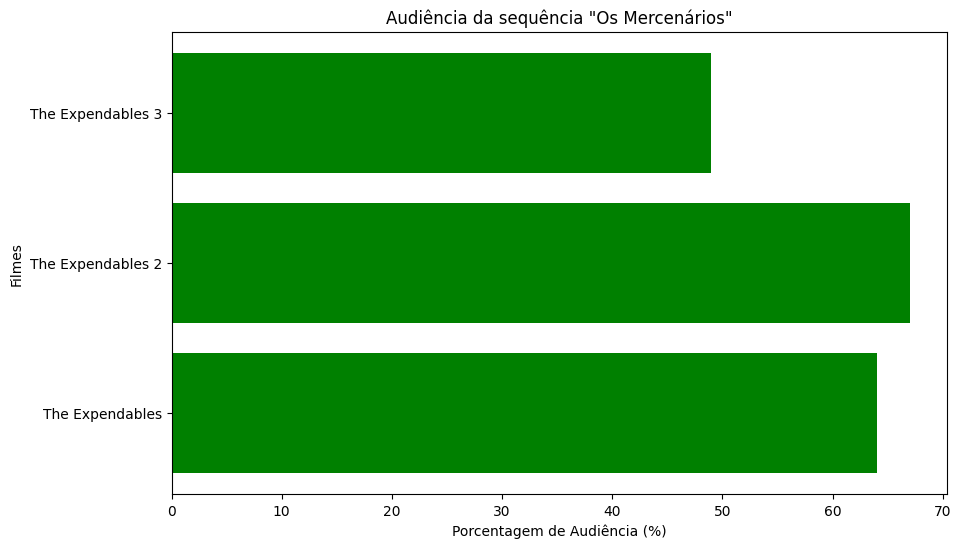

In [78]:
tomato_movies = tomatos_df[(tomatos_df['movie_title'] == 'The Expendables') | (tomatos_df['movie_title'] == 'The Expendables 2') | (tomatos_df['movie_title'] == 'The Expendables 3')]

tomato_audience = tomato_movies[['movie_title', 'audience_rating']]

# criando gráfico de colunas
plt.figure(figsize=(10, 6))
plt.barh(tomato_audience['movie_title'], tomato_audience['audience_rating'], color='green')

plt.title('Audiência da sequência "Os Mercenários"')
plt.xlabel('Porcentagem de Audiência (%)')
plt.ylabel('Filmes')

print("Audiência em portagem dos filmes")
print(f"\n{tomato_audience}")



---


**Conclusão**:

A comparação das porcentagens de audiência dos filmes *The Expendables* revela:

- **The Expendables**: 64%
- **The Expendables 2**: 67%
- **The Expendables 3**: 49%


**Resumo**: O segundo filme da franquia, *The Expendables 2*, obteve a maior porcentagem de audiência com **67%**, sugerindo uma recepção positiva maior comparada aos outros filmes. O primeiro filme segue com **64%**, enquanto The *Expendables 3* teve a menor aprovação, com **49%**. Isso pode indicar que a qualidade ou a recepção crítica dos filmes variou ao longo da série, com o segundo filme sendo o mais bem avaliado pelo público.

---



## 4) Comparação da Quantidade de Filmes na Netflix para 5 Atores Populares
- Dwayne Johnson (The Rock)
- Sylvester Stallone
- Will Smith
- Keanu Reeves
- Jack Black

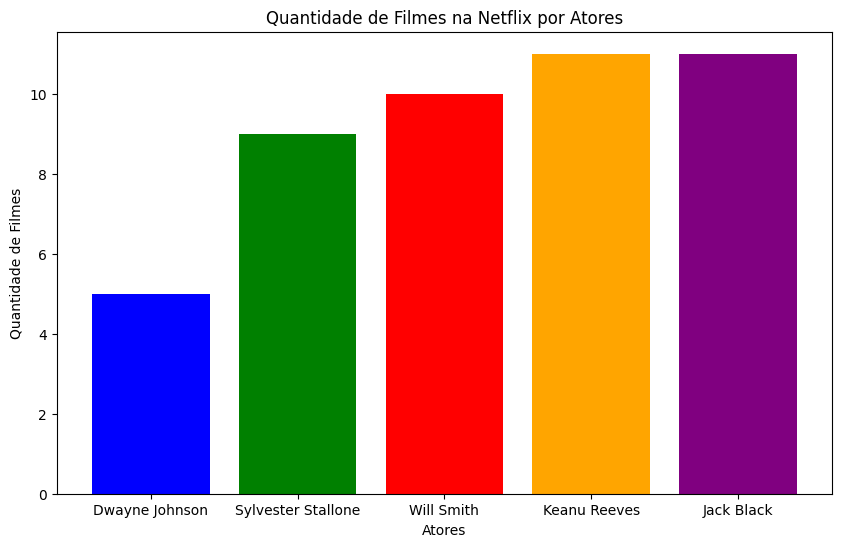

Quantidade de filmes com Dwayne Johnson na Netflix: 5
Quantidade de filmes com Stallone na Netflix: 9
Quantidade de filmes com Will Smith na Netflix: 10
Quantidade de filmes com Keanu Reeves na Netflix: 11
Quantidade de filmes com Jack Black na Netflix: 11


In [ ]:
# filtrando filmes do Dwayne Johnson (The Rock)
netflix_actor1 = netflix_df[(netflix_df['type'] == 'Movie') & (netflix_df['cast'].str.contains('Dwayne Johnson'))]

# filtrando filmes do Stallone
netflix_actor2 = netflix_df[(netflix_df['type'] == 'Movie') & (netflix_df['cast'].str.contains('Sylvester Stallone'))]

# filtrando filmes do Will Smith
netflix_actor3 = netflix_df[(netflix_df['type'] == 'Movie') & (netflix_df['cast'].str.contains('Will Smith'))]

# filtrando filmes do Keanu Reeves
netflix_actor4 = netflix_df[(netflix_df['type'] == 'Movie') & (netflix_df['cast'].str.contains('Keanu Reeves'))]

# filtrando filmes do Jack Black
netflix_actor5 = netflix_df[(netflix_df['type'] == 'Movie') & (netflix_df['cast'].str.contains('Jack Black'))]



# contagem da quantidade de filmes
qnt_rock = netflix_actor1.shape[0]
qnt_stallone = netflix_actor2.shape[0]
qnt_will = netflix_actor3.shape[0]
qnt_reeves = netflix_actor4.shape[0]
qnt_black = netflix_actor5.shape[0]

# colocando dados no gráfico
atores = ['Dwayne Johnson', 'Sylvester Stallone', 'Will Smith', 'Keanu Reeves', 'Jack Black']
quantidade = [qnt_rock, qnt_stallone, qnt_will, qnt_reeves, qnt_black]
cores = ['blue', 'green', 'red', 'orange', 'purple']

# cria um gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(atores, quantidade, color=cores)

# adiciona título e rótulos
plt.title('Quantidade de Filmes na Netflix por Atores')
plt.xlabel('Atores')
plt.ylabel('Quantidade de Filmes')

# exibe o gráfico
plt.show()

print(f"Quantidade de filmes com Dwayne Johnson na Netflix: {qnt_rock}")
print(f"Quantidade de filmes com Stallone na Netflix: {qnt_stallone}")
print(f"Quantidade de filmes com Will Smith na Netflix: {qnt_will}")
print(f"Quantidade de filmes com Keanu Reeves na Netflix: {qnt_reeves}")
print(f"Quantidade de filmes com Jack Black na Netflix: {qnt_black}")




---


**Conclusão**:

A comparação da quantidade de filmes de cinco atores na Netflix revela:

- **Dwayne Johnson**: 5 filmes
- **Stallone**: 9 filmes
- **Will Smith**: 10 filmes
- **Keanu Reeves**: 11 filmes
- **Jack Black**: 11 filmes

**Resumo**: *Keanu Reeves* e *Jack Black* são os atores com o maior número de filmes disponíveis na Netflix, com 11 cada. *Will Smith* segue com 10 filmes, e *Stallone* tem 9 filmes. *Dwayne Johnson* tem a menor quantidade, com 5 filmes. Esta distribuição pode refletir a diversidade de gêneros e o foco da Netflix em diferentes atores em seu catálogo.

---



## 5) Análise de Correlação Entre Crítica e Audiência com Regressão Linear: Adam Sandler vs. Jim Carrey


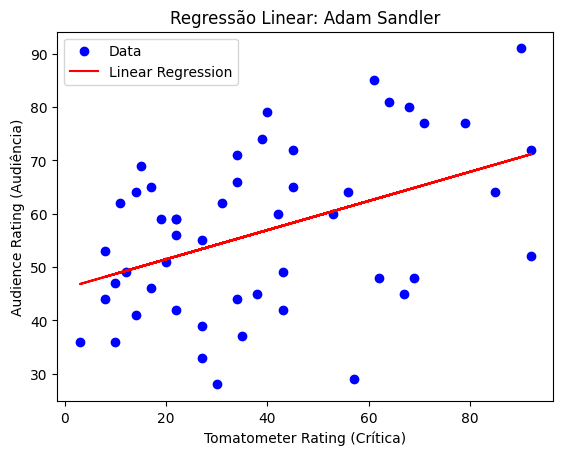

Coeficiente de Determinação (R²) para Adam Sandler: 0.19


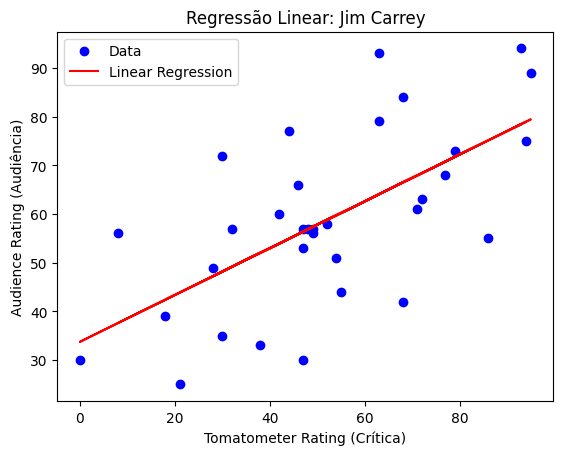

Coeficiente de Determinação (R²) para Jim Carrey: 0.40


In [ ]:
# filtra filmes de Adam Sandler e Jim Carrey
sandler_films = tomatos_df[tomatos_df['actors'].str.contains('Adam Sandler', na=False)]
carrey_films = tomatos_df[tomatos_df['actors'].str.contains('Jim Carrey', na=False)]

# prepara os dados para Regressão Linear
def apply_linear_regression(actor_films, actor_name):
    # X: Avaliação Crítica (tomatometer_rating)
    X = actor_films[['tomatometer_rating']].dropna().values.reshape(-1, 1)
    # Y: Avaliação da Audiência (audience_rating)
    Y = actor_films[['audience_rating']].dropna().values

    # aplica a regressão linear
    reg = LinearRegression().fit(X, Y)
    score = reg.score(X, Y)

    # plota o gráfico
    plt.scatter(X, Y, color='blue', label='Data')
    plt.plot(X, reg.predict(X), color='red', label='Linear Regression')
    plt.title(f'Regressão Linear: {actor_name}')
    plt.xlabel('Tomatometer Rating (Crítica)')
    plt.ylabel('Audience Rating (Audiência)')
    plt.legend()
    plt.show()

    print(f"Coeficiente de Determinação (R²) para {actor_name}: {score:.2f}")

# aplica a Regressão para Adam Sandler
apply_linear_regression(sandler_films, 'Adam Sandler')

# aplica a Regressão para Jim Carrey
apply_linear_regression(carrey_films, 'Jim Carrey')




---


**Conclusão**:

A análise entre **Adam Sandler** e **Jim Carrey** mostrou que:

- Para **Adam Sandler**, o coeficiente de determinação (R²) foi de **0.19**, indicando uma baixa correlação entre as avaliações da crítica e do público, sugerindo que os filmes dele são mais polarizadores.
  
- Para **Jim Carrey**, o R² foi de **0.40**, sugerindo uma correlação moderada e maior concordância entre as notas de críticos e audiência.

Esses resultados indicam que o público tende a divergir mais da crítica em relação aos filmes de Sandler, enquanto a recepção dos filmes de Carrey é mais alinhada entre os dois grupos.


---



## 6) Comparação da Quantidade de Filmes com Leonardo DiCaprio na Amazon e na Netflix

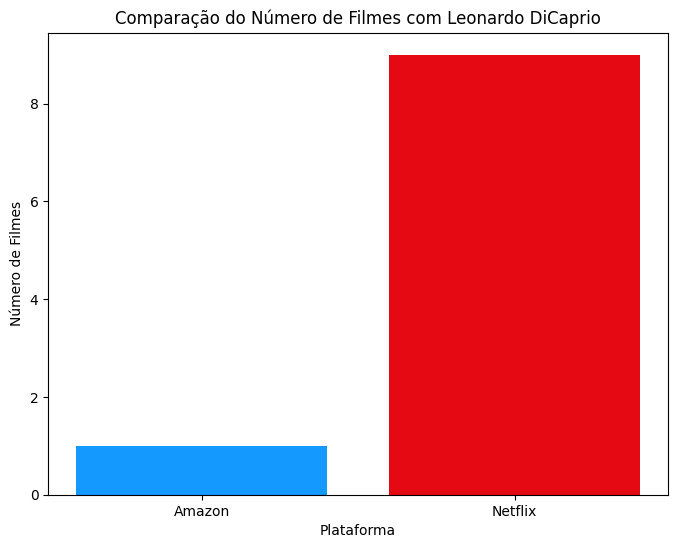

Número de filmes com Leonardo DiCaprio na Amazon: 1
Número de filmes com Leonardo DiCaprio na Netflix: 9


In [ ]:
# filtra os filmes estrelados por Leonardo DiCaprio na Amazon
amazon_di_caprio = amazon_df[amazon_df['cast'].str.contains('Leonardo DiCaprio', na=False)]

# filtra os filmes estrelados por Leonardo DiCaprio na Netflix
netflix_di_caprio = netflix_df[netflix_df['cast'].str.contains('Leonardo DiCaprio', na=False)]

# conta o número de filmes em cada plataforma
num_amazon_filmes = amazon_di_caprio.shape[0]
num_netflix_filmes = netflix_di_caprio.shape[0]

# cria um DataFrame para visualização
comparacao = pd.DataFrame({
    'Plataforma': ['Amazon', 'Netflix'],
    'Número de Filmes': [num_amazon_filmes, num_netflix_filmes]
})


plt.figure(figsize=(8, 6))
plt.bar(comparacao['Plataforma'], comparacao['Número de Filmes'], color=['#1399FF', '#E50914'])
plt.xlabel('Plataforma')
plt.ylabel('Número de Filmes')
plt.title('Comparação do Número de Filmes com Leonardo DiCaprio')
plt.show()

# mostra os resultados
print(f"Número de filmes com Leonardo DiCaprio na Amazon: {num_amazon_filmes}")
print(f"Número de filmes com Leonardo DiCaprio na Netflix: {num_netflix_filmes}")



---


**Conclusão**:

A comparação da quantidade de filmes com Leonardo DiCaprio em diferentes plataformas revela:

- **Amazon**: 1 filme
- **Netflix**: 9 filmes

**Resumo**: Leonardo DiCaprio tem uma presença muito maior na Netflix, com 9 filmes disponíveis, comparado a apenas 1 filme na Amazon. Isso indica que a Netflix oferece uma variedade significativamente maior de filmes com o ator, sugerindo um catálogo mais diversificado para os fãs do DiCaprio.

---



## 7) Melhores e Piores Filmes e Séries na Netflix: Análise das Avaliações Extremas

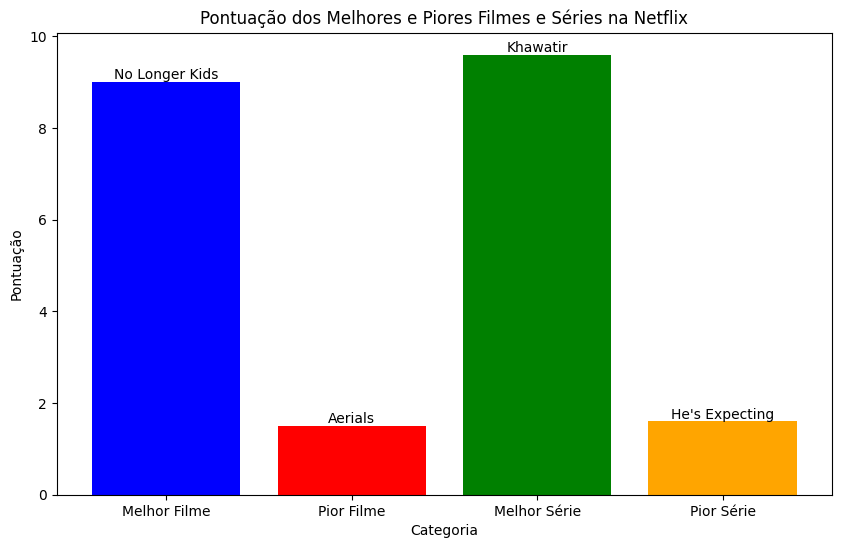

In [77]:
netflix_movies = netflix2_df[netflix2_df['type'] == 'MOVIE']
netflix_shows = netflix2_df[netflix2_df['type'] == 'SHOW']

#Encontrando o filme com a melhor e pior pontuação IMDb
melhor_filme = netflix_movies.loc[netflix_movies['imdb_score'].idxmax()]
pior_filme = netflix_movies.loc[netflix_movies['imdb_score'].idxmin()]

#Encontrando a série com a melhor e pior pontuação IMDb
melhor_serie = netflix_shows.loc[netflix_shows['imdb_score'].idxmax()]
pior_serie = netflix_shows.loc[netflix_shows['imdb_score'].idxmin()]

# dados para o gráfico
titles = ['Melhor Filme', 'Pior Filme', 'Melhor Série', 'Pior Série']
scores = [melhor_filme['imdb_score'], pior_filme['imdb_score'], melhor_serie['imdb_score'], pior_serie['imdb_score']]
names = [melhor_filme['title'], pior_filme['title'], melhor_serie['title'], pior_serie['title']]
colors = ['blue', 'red', 'green', 'orange']

# criando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(titles, scores, color=colors)

# adiciona anotações
for bar, name in zip(bars, names):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, name, va='bottom', ha='center')

# adiciona título e rótulos
plt.title('Pontuação dos Melhores e Piores Filmes e Séries na Netflix')
plt.xlabel('Categoria')
plt.ylabel('Pontuação')

# exibe o gráfico
plt.show()



---


**Conclusão**:

A análise dos melhores e piores filmes e séries na Netflix revela as maiores e menores avaliações na plataforma:

- **Melhor Filme**: *No Longer Kids* (1979)

  - **IMDB Score**: 9.0
  - **Descrição**: Aclamado por sua qualidade e profundidade, este filme se destaca como o melhor em termos de avaliação na Netflix.

- **Pior Filme**: *Aerials* (2016)

  - **IMDB Score**: 1.5
  - **Descrição**: Recebeu críticas extremamente negativas, resultando na mais baixa avaliação entre os filmes disponíveis na Netflix.

- **Melhor Série**: *Khawatir* (2005)

  - **IMDB Score**: 9.6
  - **Descrição**: Esta série é altamente valorizada, destacando-se como a melhor série na Netflix com uma nota excepcionalmente alta.

- **Pior Série**: *He's Expecting* (2022)

  - **IMDB Score**: 1.6
  - **Descrição**: Com uma avaliação muito baixa, esta série é considerada a pior entre as disponíveis na plataforma.

####**Resumo**: As análises mostram uma grande variação na qualidade dos filmes e séries na Netflix. No Longer Kids e Khawatir se destacam por suas avaliações elevadas, enquanto Aerials e He's Expecting são classificados negativamente. Essas informações podem orientar escolhas de visualização e destacar o impacto das avaliações críticas na percepção do conteúdo.
---



## 8) Média de duração de filmes entre 1980 até 1990 / 2012 até 2022

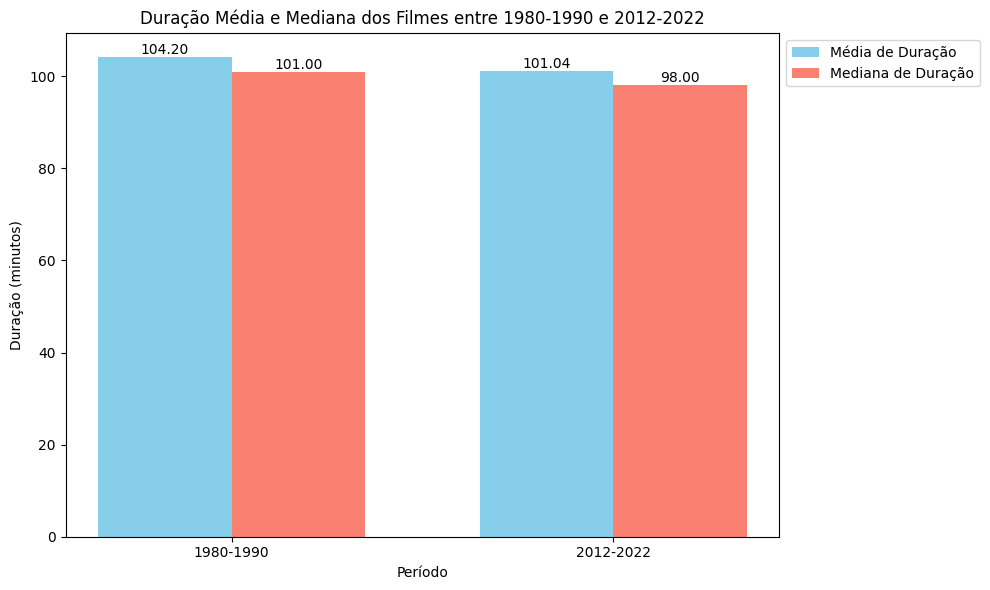

Há uma diferença significativa na média de duração dos filmes entre os dois períodos.


In [ ]:
# converte 'original_release_date' para datetime
tomatos_df['original_release_date'] = pd.to_datetime(tomatos_df['original_release_date'], errors='coerce')

# extrai o ano da coluna 'original_release_date'
tomatos_df['release_year'] = tomatos_df['original_release_date'].dt.year

# filtra os filmes lançados entre 1980-1990 e 2012-2022
df_1980_1990 = tomatos_df[(tomatos_df['release_year'] >= 1980) & (tomatos_df['release_year'] <= 1990)]
df_2012_2022 = tomatos_df[(tomatos_df['release_year'] >= 2012) & (tomatos_df['release_year'] <= 2022)]

# calcula a média de 'runtime' para cada período
media_runtime_1980_1990 = df_1980_1990['runtime'].mean()
media_runtime_2012_2022 = df_2012_2022['runtime'].mean()

# calcula a mediana de 'runtime' para cada período
mediana_runtime_1980_1990 = df_1980_1990['runtime'].median()
mediana_runtime_2012_2022 = df_2012_2022['runtime'].median()

# realizar o teste t para comparar as médias de duração entre os dois períodos
t_stat, p_value = stats.ttest_ind(df_1980_1990['runtime'].dropna(), df_2012_2022['runtime'].dropna(), equal_var=False)

# dados para o gráfico
periodos = ['1980-1990', '2012-2022']
media_duracao = [media_runtime_1980_1990, media_runtime_2012_2022]
mediana_duracao = [mediana_runtime_1980_1990, mediana_runtime_2012_2022]

# cria o gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# adiciona barras para a média
bar_width = 0.35
index = range(len(periodos))

bars1 = ax.bar(index, media_duracao, bar_width, label='Média de Duração', color='skyblue')
bars2 = ax.bar([i + bar_width for i in index], mediana_duracao, bar_width, label='Mediana de Duração', color='salmon')

# adicionar etiquetas e título
ax.set_xlabel('Período')
ax.set_ylabel('Duração (minutos)')
ax.set_title('Duração Média e Mediana dos Filmes entre 1980-1990 e 2012-2022')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(periodos)
ax.legend()

# adiciona as legendas fora das barras
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 1))

# adiciona os valores acima das barras
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom'
    )

# exibi o gráfico
plt.tight_layout()
plt.show()


# interpreta o valor p
alpha = 0.05
if p_value < alpha:
    print("Há uma diferença significativa na média de duração dos filmes entre os dois períodos.")
else:
    print("Não há uma diferença significativa na média de duração dos filmes entre os dois períodos.")



---


**Conclusão**:

A análise da duração média dos filmes revela as seguintes comparações entre os períodos de 1980-1990 e 2012-2022:

- **Média de Duração (1980-1990)**: 104.20 minutos
- **Média de Duração (2012-2022)**: 101.04 minutos
- **Mediana de Duração (1980-1990)**: 101.00 minutos
- **Mediana de Duração (2012-2022)**: 98.00 minutos

**Resumo**: Os filmes lançados entre 1980 e 1990 têm uma duração média maior (104.20 minutos) em comparação com os filmes lançados entre 2012 e 2022 (101.04 minutos). A mediana segue a mesma tendência, com 101.00 minutos para o período de 1980-1990 e 98.00 minutos para 2012-2022. Isso indica uma ligeira redução na duração média e mediana dos filmes ao longo das décadas, possivelmente refletindo mudanças nas preferências do público e nas práticas de produção.

---



## 9) Análise dos 10 Melhores e Piores Filmes na Netflix

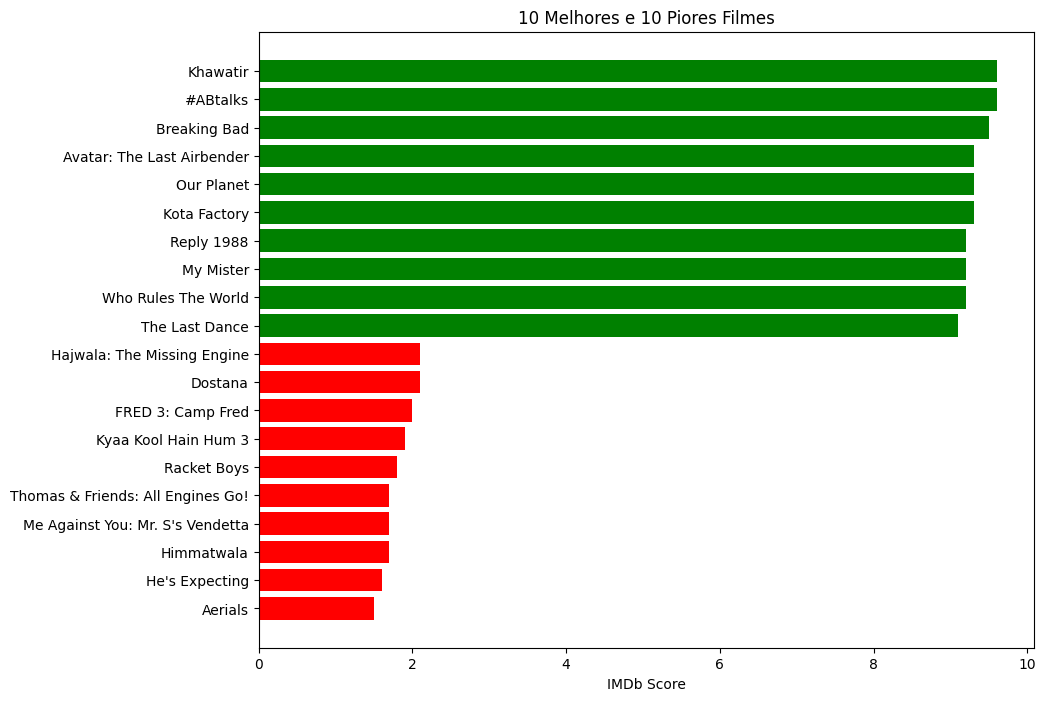

In [ ]:
melhores_filmes = netflix2_df.nlargest(10, 'imdb_score')[['title', 'imdb_score']]
piores_filmes = netflix2_df.nsmallest(10, 'imdb_score')[['title', 'imdb_score']]

# altera a ordem para que o pior filme fique em último
piores_filmes = piores_filmes.iloc[::-1]

# concatena as listas para criar um dataframe para o gráfico
filmes = pd.concat([melhores_filmes, piores_filmes])

# cria o gráfico
plt.figure(figsize=(10, 8))
plt.barh(filmes['title'], filmes['imdb_score'], color=['green']*10 + ['red']*10)
plt.xlabel('IMDb Score')
plt.title('10 Melhores e 10 Piores Filmes')
plt.gca().invert_yaxis()  # inverter a ordem dos títulos para melhor visualização
plt.show()



---


**Conclusão**:

O gráfico dos 10 melhores e piores filmes na Netflix ilustra as diferenças significativas na recepção crítica e popularidade:

- **Melhores Filmes**: Os 10 melhores filmes na Netflix destacam-se por suas altas avaliações, indicando uma forte aceitação do público e críticas positivas. Esses filmes tendem a ser os favoritos entre os assinantes da plataforma e são frequentemente recomendados.

- **Piores Filmes**: Os 10 piores filmes na Netflix, por outro lado, têm avaliações mais baixas, refletindo uma recepção crítica negativa e menor satisfação do público. Esses filmes geralmente enfrentam críticas desfavoráveis e são menos recomendados.

**Resumo**: A análise mostra uma clara distinção entre filmes altamente avaliados e aqueles com baixa performance na Netflix. Esses dados são úteis para entender as preferências dos assinantes e podem influenciar futuras escolhas de conteúdo na plataforma.

---



##10) Análise da quantidade de filmes lançados nas últimas duas décadas, comparando os valores dos filmes lançados entre 2000-2010 e 2010-2020, baseando-se nos dados do Rotten Tomatoes.


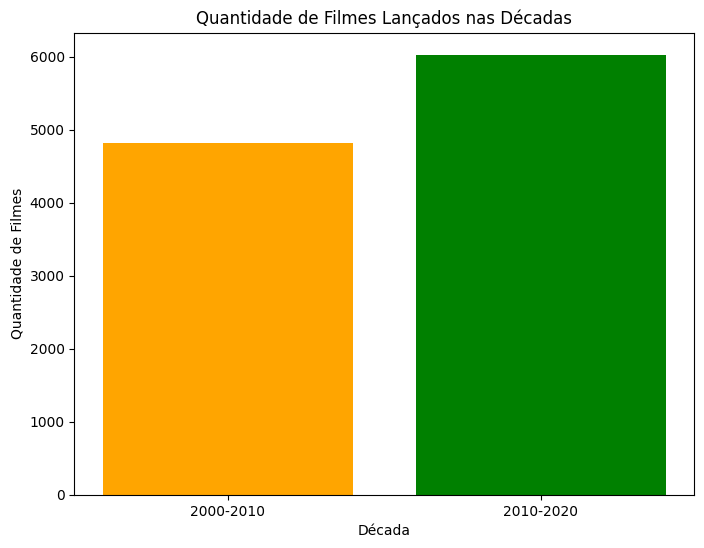

Quantidade de filmes (2000-2010): 4821
Quantidade de filmes (2010-2020): 6026


In [ ]:
# convertendo a coluna 'original_release' para datetime
tomatos_df['original_release_date'] = pd.to_datetime(tomatos_df['original_release_date'])

# extraindo apenas o ano
tomatos_df['year'] = tomatos_df['original_release_date'].dt.year

# filtrando filmes lançados em 2000-2010 e 2010-2020
decada1 = tomatos_df[(tomatos_df['year'] >= 2000) & (tomatos_df['year'] <= 2010)]
decada2 = tomatos_df[(tomatos_df['year'] > 2010) & (tomatos_df['year'] <= 2020)]

# quantidade de filmes em cada década
qnt_filmes_decada1 = decada1.shape[0]
qnt_filmes_decada2 = decada2.shape[0]

# dados do gráfico
decada = ['2000-2010', '2010-2020']
qnt_filmes = [qnt_filmes_decada1, qnt_filmes_decada2]
cores = ['orange', 'green']

# criando gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(decada, qnt_filmes, color=cores)

# adicionatítulo e rótulos
plt.title('Quantidade de Filmes Lançados nas Décadas')
plt.xlabel('Década')
plt.ylabel('Quantidade de Filmes')

# exibe o gráfico
plt.show()
print(f"Quantidade de filmes (2000-2010): {qnt_filmes_decada1}")
print(f"Quantidade de filmes (2010-2020): {qnt_filmes_decada2}")




---


**Conclusão**:

A análise da quantidade de filmes lançados nas duas últimas décadas revela uma tendência significativa de crescimento:

- **Quantidade de Filmes (2000-2010)**: 4.821 filmes
- **Quantidade de Filmes (2010-2020)**: 6.026 filmes

**Resumo**: Entre 2000 e 2010, houve um total de 4.821 filmes lançados, enquanto entre 2010 e 2020, o número aumentou para 6.026 filmes. Isso demonstra um crescimento substancial na produção cinematográfica ao longo da última década, refletindo uma expansão no mercado e uma maior oferta de conteúdo para o público. Essa tendência pode estar associada ao aumento das plataformas de streaming e à globalização da indústria cinematográfica.


---

